In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import statsmodels.api as sm

sys.path.append('../')
sys.path.append('../pywrdrb/')
from prep_input_data import *

/home/alh/PycharmProjects/.venv_spatial/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
flow_type = 'nhmv10'

catchment_inflows = pd.read_csv(f'../input_data/catchment_inflow_{flow_type}.csv')
gage_flows = pd.read_csv(f'../input_data/gage_flow_{flow_type}.csv')
catchment_inflows.tail() 

,datetime,cannonsville,pepacton,neversink,wallenpaupack,prompton,shoholaMarsh,mongaupeCombined,beltzvilleCombined,fewalter,...,01433500,delMontague,01449800,01447800,delDRCanal,delTrenton,01463620,outletAssunpink,01470960,outletSchuylkill
12141,2016-12-27,719.725849,565.227079,184.592763,294.735117,67.282361,87.122414,60.666016,50.202341,73.207602,...,113.012832,1239.095341,48.071367,239.180479,2000.508915,0.0,3.243283,41.921729,62.339146,1602.934166
12142,2016-12-28,790.547805,580.058363,173.279101,321.502199,66.425348,89.172401,63.166361,35.533662,57.299869,...,112.781005,1136.854811,37.418904,187.763405,2161.702304,0.0,2.919607,38.766669,56.403496,1433.929972
12143,2016-12-29,755.997465,557.718339,126.373177,307.398790,58.682149,85.750677,61.241045,36.283197,51.215574,...,109.995061,1217.241890,33.592771,170.969940,2042.082665,0.0,3.286974,45.449842,65.116289,1275.299664
12144,2016-12-30,694.034674,515.387778,130.455054,294.344601,53.054149,82.843602,58.788017,50.674475,46.779769,...,105.176698,1294.452103,41.156883,161.578512,2865.897642,0.0,5.657534,74.206937,81.196400,1436.087374
12145,2016-12-31,646.257954,484.734945,135.805660,289.410754,48.413140,79.747231,56.691038,61.666773,43.143462,...,100.902215,1206.925913,46.956220,153.178528,3324.777675,0.0,6.267788,84.347130,91.236481,1823.910306


In [3]:
gage_flows.tail()

,datetime,cannonsville,pepacton,neversink,wallenpaupack,prompton,shoholaMarsh,mongaupeCombined,beltzvilleCombined,fewalter,...,01433500,delMontague,01449800,01447800,delDRCanal,delTrenton,01463620,outletAssunpink,01470960,outletSchuylkill
12141,2016-12-27,719.725849,565.227079,184.592763,294.735117,67.282361,87.122414,60.666016,50.202341,73.207602,...,173.678847,4403.385057,98.273708,312.388081,6881.605434,6881.605434,35.561455,77.483184,213.739784,2066.954392
12142,2016-12-28,790.547805,580.058363,173.279101,321.502199,66.425348,89.172401,63.166361,35.533662,57.299869,...,175.947367,4395.355327,72.952565,245.063274,6909.517613,6909.517613,33.287452,72.054121,197.871016,1853.458850
12143,2016-12-29,755.997465,557.718339,126.373177,307.398790,58.682149,85.750677,61.241045,36.283197,51.215574,...,171.236106,4401.071823,69.875967,222.185514,6897.687616,6897.687616,31.686914,77.136756,218.677497,1704.935197
12144,2016-12-30,694.034674,515.387778,130.455054,294.344601,53.054149,82.843602,58.788017,50.674475,46.779769,...,163.964715,4388.815471,91.831358,208.358281,7472.351063,7472.351063,37.411406,111.618343,249.324038,1870.358553
12145,2016-12-31,646.257954,484.734945,135.805660,289.410754,48.413140,79.747231,56.691038,61.666773,43.143462,...,157.593253,4251.125673,108.622993,196.321990,7962.153860,7962.153860,44.317949,128.665079,260.563301,2290.412460


In [4]:
nonnyc_gage_flows = add_upstream_catchment_inflows(catchment_inflows, exclude_NYC=True)

/home/alh/PycharmProjects/Pywr-DRB/notebooks/../pywrdrb/prep_input_data.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflows[node].iloc[lag:] += inflows[upstream].iloc[:-lag].values
/home/alh/PycharmProjects/Pywr-DRB/notebooks/../pywrdrb/prep_input_data.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflows[node].iloc[:lag] += inflows[upstream].iloc[:lag].values
/home/alh/PycharmProjects/Pywr-DRB/notebooks/../pywrdrb/prep_input_data.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [56]:
def predict_future_inflows(inflows, node, lag, use_log, remove_zeros, use_const, print_summary=False, plot_scatter=True):

    Y = inflows[node].iloc[lag:]
    if use_const:
        X = np.ones((len(Y), 2))
        X[:,1] = inflows[node].iloc[:-lag]
        if remove_zeros:
            nonzeros = np.logical_and(Y > 0.01, X[:,1] > 0.01)
            Y = Y[nonzeros]
            X = X[nonzeros,:]
#             print(Y.min(), X[:,1].min())
    else:
        X = inflows[node].iloc[:-lag]
        if remove_zeros:
            nonzeros = np.logical_and(Y > 0.01, X > 0.01)
            Y = Y[nonzeros]
            X = X[nonzeros,:]
    if use_log:
        Y += 0.001
        X += 0.001
        Y = np.log(Y)
        X = np.log(X)
        
    if plot_scatter:
        plt.figure()
        if use_const:
            plt.scatter(X[:,1], Y)
        else:
            plt.scatter(X, Y)
            
        plt.title(node)
        plt.xlabel('Catchment inflow on day t')
        plt.ylabel(f'Catchment inflow on day t+{lag}')    
        
    if use_const:
        lm = sm.OLS(Y, X, hasconst=True)
        lr = lm.fit()
        const, slope = lr.params[0], lr.params[1]
    else:
        lm = sm.OLS(Y, X, hasconst=False)
        lr = lm.fit()
        const, slope = 0, lr.params[0]

    print(f'{node}, lag {lag}, R^2: {round(lr.rsquared, 4)}')
    if print_summary:
        print(lr.summary())
        print()
    
    if plot_scatter:
        if use_const:
            plt.scatter(X[:,1], const + slope * X[:,1])
        else:
            plt.scatter(X, slope * X)
            
    
    return const, slope

01436000, lag 1, R^2: 0.1053
wallenpaupack, lag 1, R^2: 0.6076
prompton, lag 1, R^2: 0.418
shoholaMarsh, lag 1, R^2: 0.7559
mongaupeCombined, lag 1, R^2: 0.6019
01433500, lag 1, R^2: 0.3548
delMontague, lag 1, R^2: 0.5498
beltzvilleCombined, lag 1, R^2: 0.3319
01447800, lag 1, R^2: 0.1783
fewalter, lag 1, R^2: 0.3704
01449800, lag 1, R^2: 0.1877


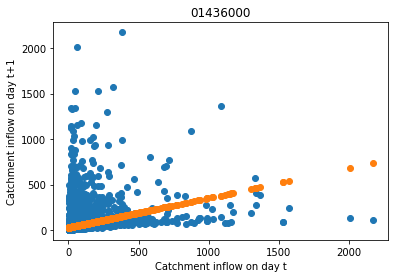

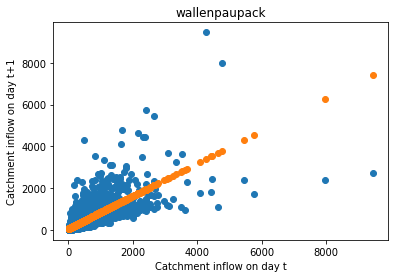

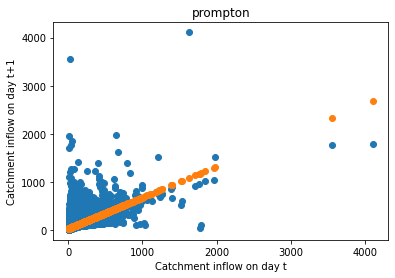

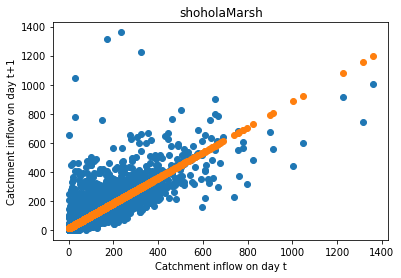

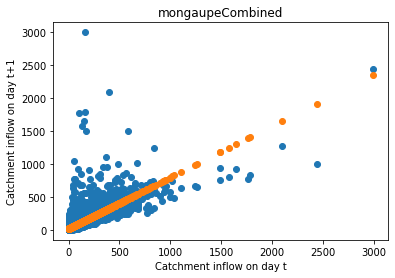

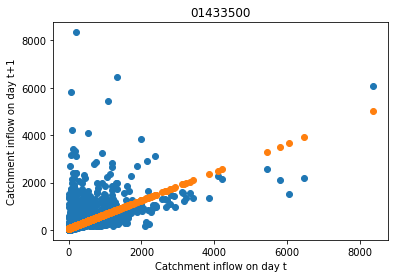

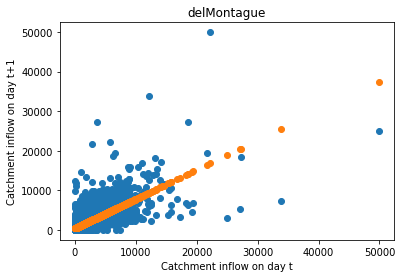

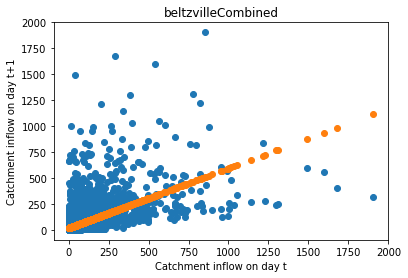

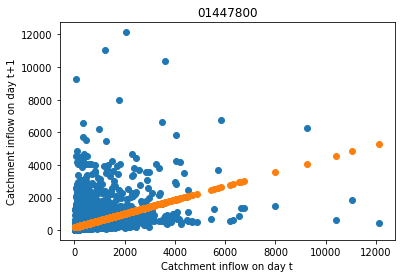

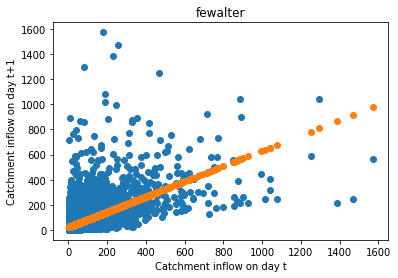

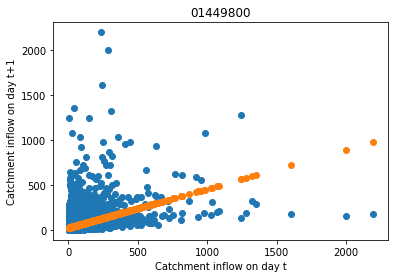

In [57]:
use_log = False
remove_zeros = True if use_log else False
use_const = True
regressions = {}
lag = 1
lag_1_nodes = ['01436000', 'wallenpaupack', 'prompton', 'shoholaMarsh', 'mongaupeCombined', '01433500', 'delMontague', 'beltzvilleCombined','01447800','fewalter','01449800']
for node in lag_1_nodes:
    const, slope = predict_future_inflows(catchment_inflows, node, lag, use_log=use_log, remove_zeros=remove_zeros, use_const=use_const)
    regressions[(node, lag)] = {'const': const, 'slope': slope}

mongaupeCombined, lag 2, R^2: 0.3725
01433500, lag 2, R^2: 0.0779
delMontague, lag 2, R^2: 0.2181
beltzvilleCombined, lag 2, R^2: 0.142
01447800, lag 2, R^2: 0.0335
fewalter, lag 2, R^2: 0.1645
01449800, lag 2, R^2: 0.0598
merrillCreek, lag 2, R^2: 0.1776
hopatcong, lag 2, R^2: 0.0932


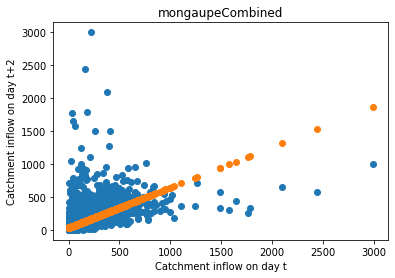

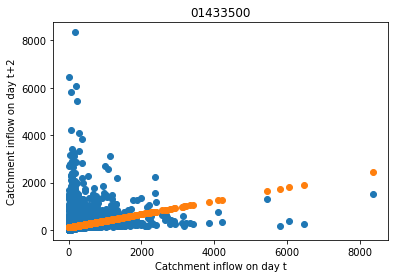

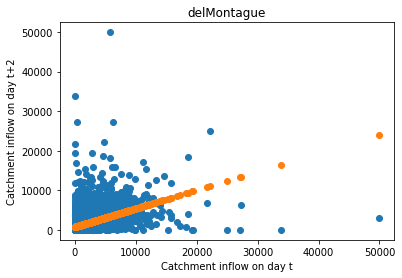

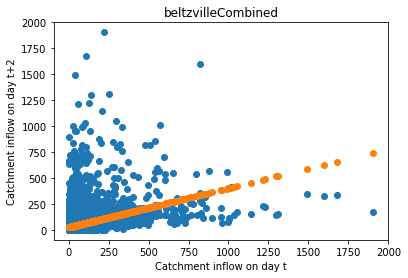

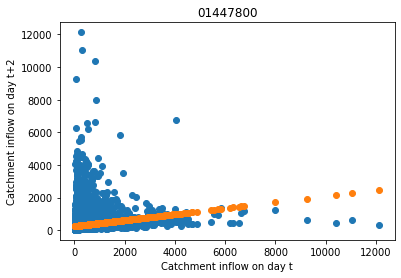

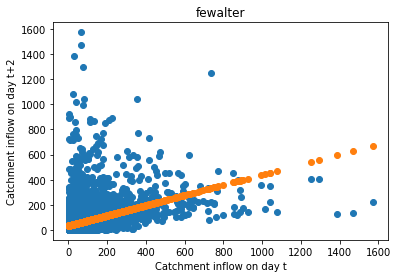

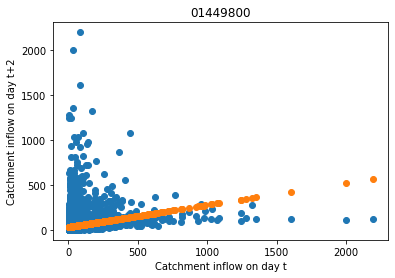

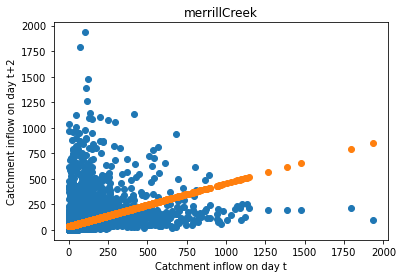

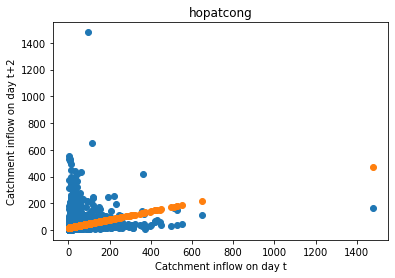

In [59]:
lag = 2
lag_2_nodes = ['mongaupeCombined', '01433500', 'delMontague', 'beltzvilleCombined','01447800','fewalter','01449800', 'merrillCreek','hopatcong']
for node in lag_2_nodes:
    const, slope = predict_future_inflows(catchment_inflows, node, lag, use_log=use_log, remove_zeros=remove_zeros, use_const=use_const)
    regressions[(node, lag)] = {'const': const, 'slope': slope}    

merrillCreek, lag 3, R^2: 0.1463
hopatcong, lag 3, R^2: 0.0752
nockamixon, lag 3, R^2: 0.0752
delDRCanal, lag 3, R^2: 0.1696


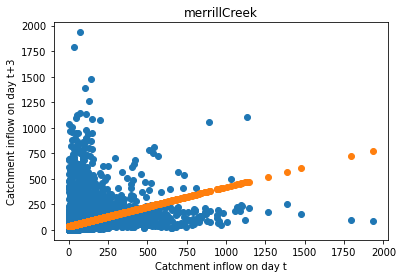

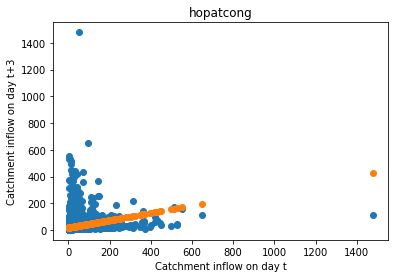

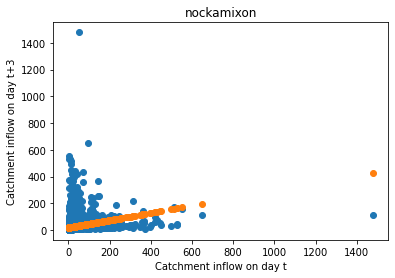

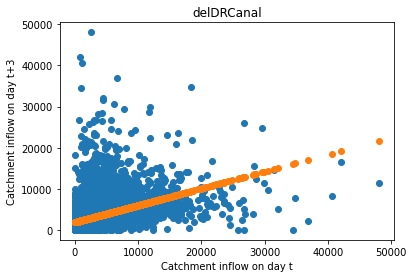

In [60]:
lag = 3
lag_3_nodes = ['merrillCreek','hopatcong', 'nockamixon','delDRCanal']
for node in lag_3_nodes:
    const, slope = predict_future_inflows(catchment_inflows, node, lag, use_log=use_log, remove_zeros=remove_zeros, use_const=use_const)
    regressions[(node, lag)] = {'const': const, 'slope': slope}

nockamixon, lag 4, R^2: 0.081
delDRCanal, lag 4, R^2: 0.1499


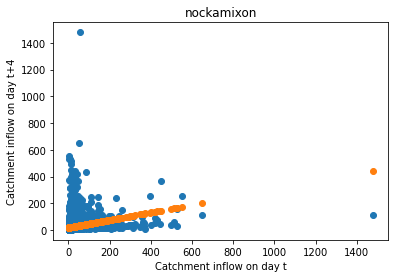

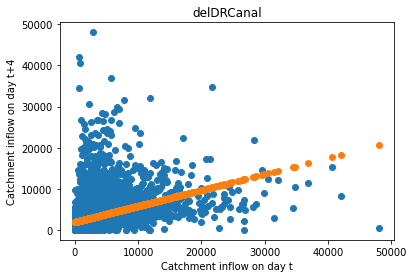

In [61]:
lag = 4
lag_4_nodes = ['nockamixon','delDRCanal']
for node in lag_4_nodes:
    const, slope = predict_future_inflows(catchment_inflows, node, lag, use_log=use_log, remove_zeros=remove_zeros, use_const=use_const)
    regressions[(node, lag)] = {'const': const, 'slope': slope}

In [62]:
regressions

{('01436000', 1): {'const': 27.622504503953962, 'slope': 0.3244295157470351},
 ('wallenpaupack', 1): {'const': 64.65493223232977,
  'slope': 0.779483728268093},
 ('prompton', 1): {'const': 29.07844664167982, 'slope': 0.6465450591370997},
 ('shoholaMarsh', 1): {'const': 10.855536472311702,
  'slope': 0.8693883449042704},
 ('mongaupeCombined', 1): {'const': 18.651363949303754,
  'slope': 0.7758009515139042},
 ('01433500', 1): {'const': 59.05828592143265, 'slope': 0.5956639554860685},
 ('delMontague', 1): {'const': 358.20579262466606,
  'slope': 0.7414761468693247},
 ('beltzvilleCombined', 1): {'const': 18.162824540034837,
  'slope': 0.5761165404989996},
 ('01447800', 1): {'const': 174.48686016345272, 'slope': 0.42224482708710476},
 ('fewalter', 1): {'const': 22.553105460374276, 'slope': 0.6085965909574251},
 ('01449800', 1): {'const': 24.975192514563464, 'slope': 0.43327707805250787},
 ('mongaupeCombined', 2): {'const': 32.41994044512786,
  'slope': 0.6103106181794453},
 ('01433500', 2):

In [63]:
def get_flow_or_prediction(catchment_inflows, regressions, node, lag, idx, use_log, mode):
    ### mode: predict, perfect_foresight, same_day
    if mode == 'same_day':
        return catchment_inflows[node].iloc[idx]
    elif mode in ['perfect_foresight', 'predict']:
        if (lag == 0) or (lag == -1 and idx == 0):
            return catchment_inflows[node].iloc[idx]
        elif lag == -1:
            return catchment_inflows[node].iloc[idx-1]
        elif lag > 0:
            if mode == 'perfect_foresight':
                if idx < catchment_inflows.shape[0] - lag:
                    return catchment_inflows[node].iloc[idx + lag]
                else:
                    return catchment_inflows[node].iloc[-1]
            else:
                const = regressions[(node, lag)]['const']
                slope = regressions[(node, lag)]['slope']
                value = catchment_inflows[node].iloc[idx]
                if use_log:
                    prediction = np.exp(const + slope * np.log(value))
                else:
                    prediction = const + slope * value
                return prediction

Text(0, 0.5, 'flow day t+1')

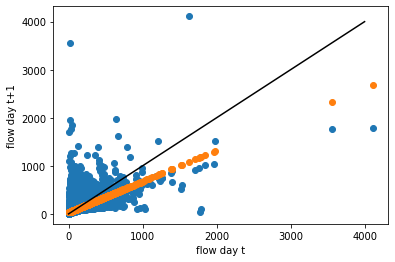

In [64]:
### test prediction function
node = 'prompton'
lag = 1
mode = 'predict'
pred = [get_flow_or_prediction(catchment_inflows, regressions, node, lag, idx, use_log, 'predict') for idx in range(catchment_inflows.shape[0])]
plt.scatter(catchment_inflows[node].iloc[:-lag], catchment_inflows[node].iloc[lag:])
plt.scatter(catchment_inflows[node].iloc[:-lag], pred[:-lag])
plt.plot([0,4000],[0,4000], color='k')
plt.xlabel('flow day t')
plt.ylabel(f'flow day t+{lag}')

corr:  0.8128252616711907


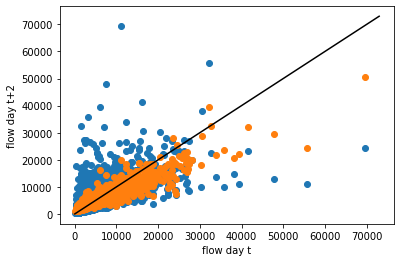

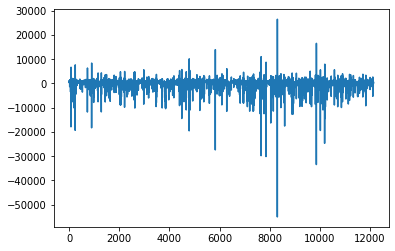

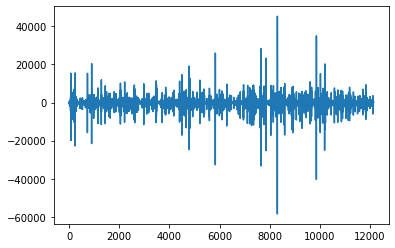

In [65]:
### get full lagged predictions for montague & trenton
pred_nonnyc_gage_flow = pd.DataFrame()
pred_node = 'delMontague'
pred_lag = 2
node_lags = [('01425000', 0), ('01417000', 0), ('delLordville', 0),
             ('01436000', 1), ('wallenpaupack', 1), ('prompton', 1), ('shoholaMarsh', 1),
             ('mongaupeCombined', 2), ('01433500', 2), ('delMontague', 2)]


pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'] = np.zeros(catchment_inflows.shape[0])
for node, lag in node_lags:
    pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'] += np.array([get_flow_or_prediction(catchment_inflows, regressions, node, lag, idx, use_log, mode) for idx in range(catchment_inflows.shape[0])])
    

plt.scatter(nonnyc_gage_flows[node].iloc[:-lag].values, nonnyc_gage_flows[node].iloc[lag:].values)
plt.scatter(nonnyc_gage_flows[node].iloc[:-lag].values, pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'].iloc[:-lag].values)
print('corr: ', np.corrcoef(pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'].iloc[:-lag].values, nonnyc_gage_flows[node].iloc[lag:].values)[0,1])
plt.plot([0,plt.xlim()[1]],[0,plt.xlim()[1]], color='k')
plt.xlabel('flow day t')
plt.ylabel(f'flow day t+{lag}')

plt.figure()
plt.plot(pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'].iloc[:-lag].values - nonnyc_gage_flows[node].iloc[lag:].values)

plt.figure()
plt.plot(nonnyc_gage_flows[node].iloc[:-lag].values - nonnyc_gage_flows[node].iloc[lag:].values)

corr:  0.9253576551225325


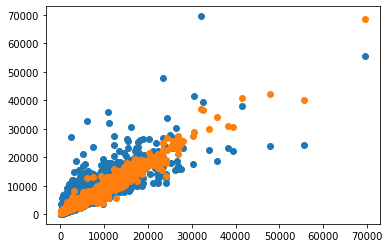

In [67]:
### get full lagged predictions for montague & trenton
pred_node = 'delMontague'
pred_lag = 1
node_lags = [('01425000', -1), ('01417000', -1), ('delLordville', -1),
             ('01436000', 0), ('wallenpaupack', 0), ('prompton', 0), ('shoholaMarsh', 0),
             ('mongaupeCombined', 1), ('01433500', 1), ('delMontague', 1)]

pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'] = np.zeros(catchment_inflows.shape[0])
for node, lag in node_lags:
    pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'] += np.array([get_flow_or_prediction(catchment_inflows, regressions, node, lag, idx, use_log, mode) for idx in range(catchment_inflows.shape[0])])
    

plt.scatter(nonnyc_gage_flows[node].iloc[:-lag], nonnyc_gage_flows[node].iloc[lag:])
plt.scatter(nonnyc_gage_flows[node].iloc[:-lag], pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'].iloc[:-lag])
print('corr: ', np.corrcoef(pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'].iloc[:-lag], nonnyc_gage_flows[node].iloc[lag:])[0,1])

corr:  0.5997116239039767


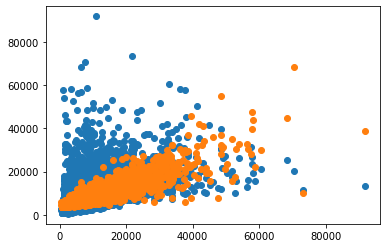

In [68]:
### get full lagged predictions for montague & trenton
pred_node = 'delTrenton'
pred_lag = 4
node_lags = [('01425000', 0), ('01417000', 0), ('delLordville', 0),
             ('01436000', 1), ('wallenpaupack', 1), ('prompton', 1), ('shoholaMarsh', 1),
             ('mongaupeCombined', 2), ('01433500', 2), ('delMontague', 2),
             ('beltzvilleCombined', 2), ('01447800', 2), ('fewalter', 2), ('01449800', 2),
             ('hopatcong', 3), ('merrillCreek', 3),
             ('nockamixon', 4), ('delDRCanal', 4)]

pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'] = np.zeros(catchment_inflows.shape[0])
for node, lag in node_lags:
    pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'] += np.array([get_flow_or_prediction(catchment_inflows, regressions, node, lag, idx, use_log, mode) for idx in range(catchment_inflows.shape[0])])
    

plt.scatter(nonnyc_gage_flows[node].iloc[:-lag], nonnyc_gage_flows[node].iloc[lag:])
plt.scatter(nonnyc_gage_flows[node].iloc[:-lag], pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'].iloc[:-lag])
print('corr: ', np.corrcoef(pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'].iloc[:-lag], nonnyc_gage_flows[node].iloc[lag:])[0,1])

corr:  0.709852114749972


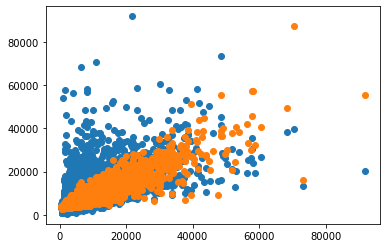

In [69]:
### get full lagged predictions for montague & trenton
pred_node = 'delTrenton'
pred_lag = 3
node_lags = [('01425000', -1), ('01417000', -1), ('delLordville', -1),
             ('01436000', 0), ('wallenpaupack', 0), ('prompton', 0), ('shoholaMarsh', 0),
             ('mongaupeCombined', 1), ('01433500', 1), ('delMontague', 1),
             ('beltzvilleCombined', 1), ('01447800', 1), ('fewalter', 1), ('01449800', 1),
             ('hopatcong', 2), ('merrillCreek', 2),
             ('nockamixon', 3), ('delDRCanal', 3)]

pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'] = np.zeros(catchment_inflows.shape[0])
for node, lag in node_lags:
    pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'] += np.array([get_flow_or_prediction(catchment_inflows, regressions, node, lag, idx, use_log, mode) for idx in range(catchment_inflows.shape[0])])
    

plt.scatter(nonnyc_gage_flows[node].iloc[:-lag], nonnyc_gage_flows[node].iloc[lag:])
plt.scatter(nonnyc_gage_flows[node].iloc[:-lag], pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'].iloc[:-lag])
print('corr: ', np.corrcoef(pred_nonnyc_gage_flow[f'{pred_node}_{pred_lag}'].iloc[:-lag], nonnyc_gage_flows[node].iloc[lag:])[0,1])

### test predictions after creating dataset (main script)

In [70]:
predict = pd.read_csv(f'../input_data/predicted_nonnyc_gage_flow_{flow_type}.csv')
predict

,datetime,delMontague_lag2_predict,delMontague_lag2_perfect_foresight,delMontague_lag2_same_day,delMontague_lag1_predict,delMontague_lag1_perfect_foresight,delMontague_lag1_same_day,delTrenton_lag4_predict,delTrenton_lag4_perfect_foresight,delTrenton_lag4_same_day,delTrenton_lag3_predict,delTrenton_lag3_perfect_foresight,delTrenton_lag3_same_day
0,1983-10-01,515.739781,649.500392,669.025082,603.014074,1516.624456,669.025082,1215.316109,1700.443068,1683.861969,1330.138642,2782.233129,1683.861969
1,1983-10-02,562.768134,571.006435,730.896636,643.856801,649.500392,730.896636,1439.008022,1552.694945,1993.367174,1552.168632,1700.443068,1993.367174
2,1983-10-03,513.793719,469.967217,649.499533,577.742726,571.006435,649.499533,1534.670122,1637.582857,2095.663070,1626.639098,1552.694945,2095.663070
3,1983-10-04,427.736450,398.610074,533.306126,507.029536,469.967217,533.306126,1282.291516,1621.653872,1745.690156,1385.278800,1637.582857,1745.690156
4,1983-10-05,337.203112,417.450695,414.393356,412.386417,398.610074,414.393356,1064.885162,1518.242156,1450.562328,1161.406033,1621.653872,1450.562328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12141,2016-12-27,2400.352274,2961.833420,2962.908276,2714.244660,2851.314790,2962.908276,4071.291768,6645.234166,5433.348049,4474.599789,6087.826961,5433.348049
12142,2016-12-28,2407.431899,3049.743059,2938.318184,2664.795225,2961.833420,2938.318184,4152.215282,6758.429417,5476.539897,4485.851868,6645.234166,5476.539897
12143,2016-12-29,2483.768128,2984.700529,3029.550085,2747.024456,3049.743059,3029.550085,4126.913889,6698.142230,5416.554938,4460.839246,6758.429417,5416.554938
12144,2016-12-30,2446.194401,2904.942218,3010.621257,2835.600026,2984.700529,3010.621257,4697.967478,6618.383920,6243.423111,5168.734239,6698.142230,6243.423111


(0.0, 3000.0)

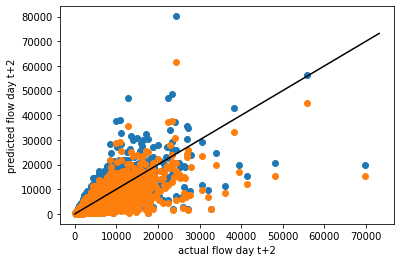

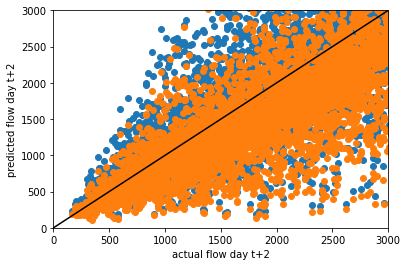

In [71]:
node = 'delMontague'
lag = 2

plt.scatter(predict[f'{node}_lag{lag}_perfect_foresight'], predict[f'{node}_lag{lag}_same_day'])
plt.scatter(predict[f'{node}_lag{lag}_perfect_foresight'], predict[f'{node}_lag{lag}_predict'])
plt.plot([0,plt.xlim()[1]],[0,plt.xlim()[1]], color='k')
plt.xlabel(f'actual flow day t+{lag}')
plt.ylabel(f'predicted flow day t+{lag}')

plt.figure()
plt.scatter(predict[f'{node}_lag{lag}_perfect_foresight'], predict[f'{node}_lag{lag}_same_day'])
plt.scatter(predict[f'{node}_lag{lag}_perfect_foresight'], predict[f'{node}_lag{lag}_predict'])
plt.plot([0,plt.xlim()[1]],[0,plt.xlim()[1]], color='k')
plt.xlabel(f'actual flow day t+{lag}')
plt.ylabel(f'predicted flow day t+{lag}')
plt.xlim([0,3000])
plt.ylim([0,3000])